In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt


In [4]:
training = pd.read_csv(r"C:\Users\gianl\Downloads\titanic\train.csv")
test = pd.read_csv(r"C:\Users\gianl\Downloads\titanic\test.csv")

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
#quick look at our data types & null counts 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
training.describe()
training.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           1

In [7]:
#quick way to separate numeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [8]:
# look at numeric and categorical values separately 
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

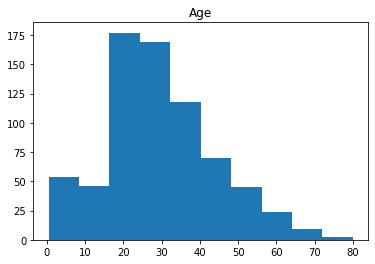

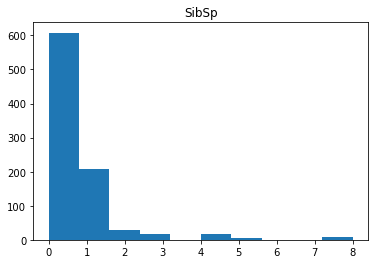

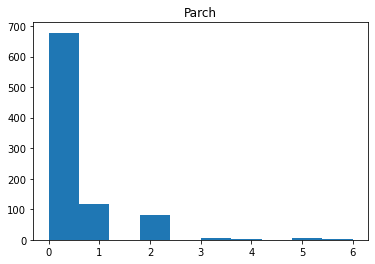

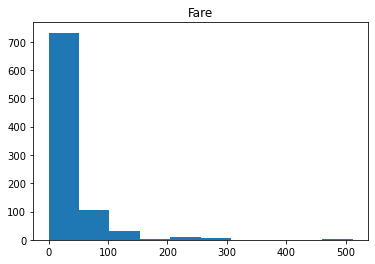

In [9]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

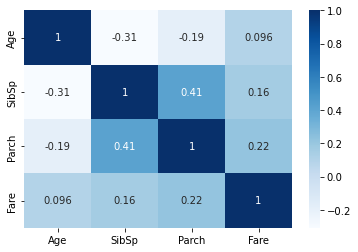

In [10]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True, cmap="Blues")

In [11]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


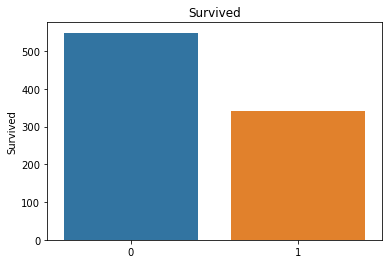

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


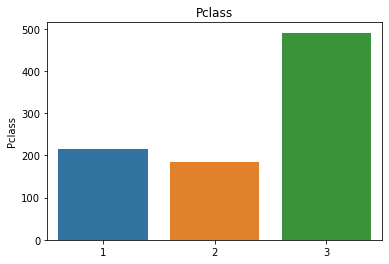

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


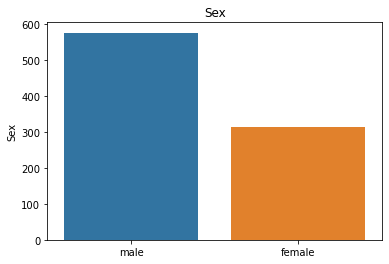

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


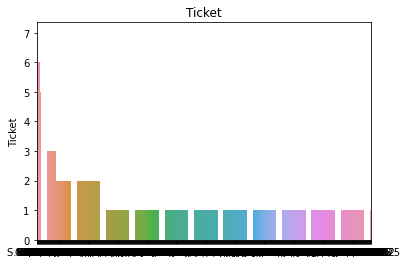

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


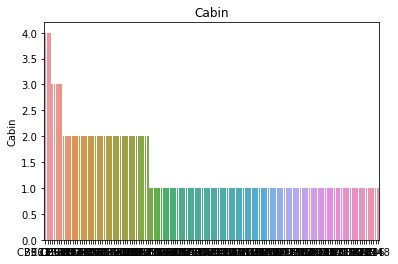

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


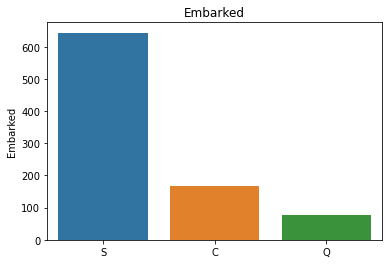

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [13]:
df_cat.head()

Survived  Pclass     Sex            Ticket Cabin Embarked
0         0       3    male         A/5 21171   NaN        S
1         1       1  female          PC 17599   C85        C
2         1       3  female  STON/O2. 3101282   NaN        S
3         1       1  female            113803  C123        S
4         0       3    male            373450   NaN        S

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass')

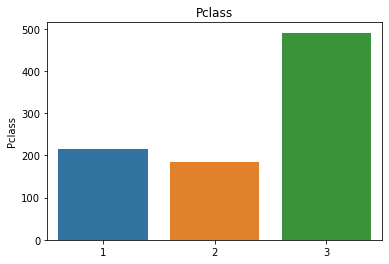

In [14]:
sns.barplot(df_cat['Pclass'].value_counts().index, df_cat['Pclass'].value_counts()).set_title('Pclass')

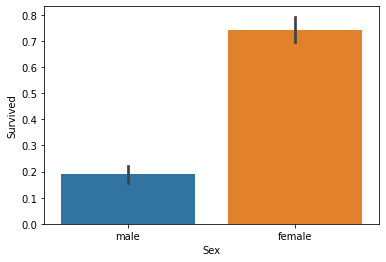

In [15]:
sns.barplot(x='Sex', y='Survived', data=df_cat);

In [16]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [17]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# # after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# # letters 
# # multiple letters 
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [19]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

In [20]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [21]:
#comparing surivival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0

In [22]:
#understand ticket values better 
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [23]:
training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

0      0
1      0
2      0
3      1
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Ticket, Length: 891, dtype: int64

In [24]:
training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

0          a5
1          pc
2      stono2
3           0
4           0
        ...  
886         0
887         0
888        wc
889         0
890         0
Name: Ticket, Length: 891, dtype: object

In [26]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [27]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.options.display.max_rows = None
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [28]:
pd.options.display.max_rows

In [29]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket    0    1
Survived                
0               142  407
1                88  254

In [30]:
#survival rate across different tyicket types 
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]

In [31]:
#feature engineering on person's title 
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [32]:
training.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [101]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [105]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [107]:
#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [109]:
#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

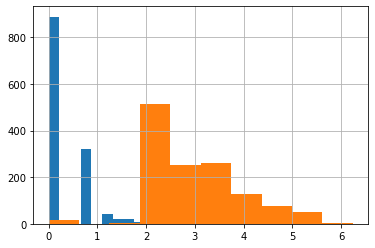

In [113]:
#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [118]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [120]:
pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

Pclass    Age  SibSp  Parch  norm_fare  cabin_multiple  numeric_ticket  \
0         3  22.00      1      0   2.110213               0               0   
1         1  38.00      1      0   4.280593               1               0   
2         3  26.00      0      0   2.188856               0               0   
3         1  35.00      1      0   3.990834               1               1   
4         3  35.00      0      0   2.202765               0               1   
5         3  28.00      0      0   2.246893               0               1   
6         1  54.00      0      0   3.967694               1               1   
7         3   2.00      3      1   3.094446               0               1   
8         3  27.00      0      2   2.495954               0               1   
9         2  14.00      1      0   3.436268               0               1   
10        3   4.00      1      1   2.873565               1               0   
11        1  58.00      0      0   3.316003               1               1   
12        3  20.00      0      0   2.202765               0               0   
13        3  39.00      1      5   3.474293               0               1   
14        3  14.00      0      0   2.180892               0               1   
15        2  55.00      0      0   2.833213               0               1   
16        3   2.00      4      1   3.405355               0               1   
17        2  28.00      0      0   2.639057               0               1   
18        3  31.00      1      0   2.944439               0               1   
19        3  28.00      0      0   2.107178               0               1   
20        2  35.00      0      0   3.295837               0               1   
21        2  34.00      0      0   2.639057               1               1   
22        3  15.00      0      0   2.200464               0               1   
23        1  28.00      0      0   3.597312               1               1   
24        3   8.00      3      1   3.094446               0               1   
25        3  38.00      1      5   3.477773               0               1   
26        3  28.00      0      0   2.107178               0               1   
27        1  19.00      3      2   5.575949               3               1   
28        3  28.00      0      0   2.183711               0               1   
29        3  28.00      0      0   2.185579               0               1   
30        1  40.00      0      0   3.357622               0               0   
31        1  28.00      1      0   4.993969               1               0   
32        3  28.00      0      0   2.169054               0               1   
33        2  66.00      0      0   2.442347               0               0   
34        1  28.00      1      0   4.420896               0               0   
35        1  42.00      1      0   3.970292               0               1   
36        3  28.00      0      0   2.107689               0               1   
37        3  21.00      0      0   2.202765               0               0   
38        3  18.00      2      0   2.944439               0               1   
39        3  14.00      1      0   2.504848               0               1   
40        3  40.00      1      0   2.348991               0               1   
41        2  27.00      1      0   3.091042               0               1   
42        3  28.00      0      0   2.185579               0               1   
43        2   3.00      1      2   3.751366               0               0   
44        3  19.00      0      0   2.183711               0               1   
45        3  28.00      0      0   2.202765               0               0   
46        3  28.00      1      0   2.803360               0               1   
47        3  28.00      0      0   2.169054               0               1   
48        3  28.00      2      0   3.121448               0               1   
49        3  18.00      1      0   2.933857            

In [129]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

In [126]:
all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)

Pclass    Age  SibSp  Parch  norm_fare  cabin_multiple  numeric_ticket  \
0         3  22.00      1      0   2.110213               0               0   
1         1  38.00      1      0   4.280593               1               0   
2         3  26.00      0      0   2.188856               0               0   
3         1  35.00      1      0   3.990834               1               1   
4         3  35.00      0      0   2.202765               0               1   
5         3  28.00      0      0   2.246893               0               1   
6         1  54.00      0      0   3.967694               1               1   
7         3   2.00      3      1   3.094446               0               1   
8         3  27.00      0      2   2.495954               0               1   
9         2  14.00      1      0   3.436268               0               1   
10        3   4.00      1      1   2.873565               1               0   
11        1  58.00      0      0   3.316003               1               1   
12        3  20.00      0      0   2.202765               0               0   
13        3  39.00      1      5   3.474293               0               1   
14        3  14.00      0      0   2.180892               0               1   
15        2  55.00      0      0   2.833213               0               1   
16        3   2.00      4      1   3.405355               0               1   
17        2  28.00      0      0   2.639057               0               1   
18        3  31.00      1      0   2.944439               0               1   
19        3  28.00      0      0   2.107178               0               1   
20        2  35.00      0      0   3.295837               0               1   
21        2  34.00      0      0   2.639057               1               1   
22        3  15.00      0      0   2.200464               0               1   
23        1  28.00      0      0   3.597312               1               1   
24        3   8.00      3      1   3.094446               0               1   
25        3  38.00      1      5   3.477773               0               1   
26        3  28.00      0      0   2.107178               0               1   
27        1  19.00      3      2   5.575949               3               1   
28        3  28.00      0      0   2.183711               0               1   
29        3  28.00      0      0   2.185579               0               1   
30        1  40.00      0      0   3.357622               0               0   
31        1  28.00      1      0   4.993969               1               0   
32        3  28.00      0      0   2.169054               0               1   
33        2  66.00      0      0   2.442347               0               0   
34        1  28.00      1      0   4.420896               0               0   
35        1  42.00      1      0   3.970292               0               1   
36        3  28.00      0      0   2.107689               0               1   
37        3  21.00      0      0   2.202765               0               0   
38        3  18.00      2      0   2.944439               0               1   
39        3  14.00      1      0   2.504848               0               1   
40        3  40.00      1      0   2.348991               0               1   
41        2  27.00      1      0   3.091042               0               1   
42        3  28.00      0      0   2.185579               0               1   
43        2   3.00      1      2   3.751366               0               0   
44        3  19.00      0      0   2.183711               0               1   
45        3  28.00      0      0   2.202765               0               0   
46        3  28.00      1      0   2.803360               0               1   
47        3  28.00      0      0   2.169054               0               1   
48        3  28.00      2      0   3.121448               0               1   
49        3  18.00      1      0   2.933857            

In [128]:
all_dummies[all_dummies.train_test == 1]

Pclass    Age  SibSp  Parch  norm_fare  cabin_multiple  numeric_ticket  \
0         3  22.00      1      0   2.110213               0               0   
1         1  38.00      1      0   4.280593               1               0   
2         3  26.00      0      0   2.188856               0               0   
3         1  35.00      1      0   3.990834               1               1   
4         3  35.00      0      0   2.202765               0               1   
5         3  28.00      0      0   2.246893               0               1   
6         1  54.00      0      0   3.967694               1               1   
7         3   2.00      3      1   3.094446               0               1   
8         3  27.00      0      2   2.495954               0               1   
9         2  14.00      1      0   3.436268               0               1   
10        3   4.00      1      1   2.873565               1               0   
11        1  58.00      0      0   3.316003               1               1   
12        3  20.00      0      0   2.202765               0               0   
13        3  39.00      1      5   3.474293               0               1   
14        3  14.00      0      0   2.180892               0               1   
15        2  55.00      0      0   2.833213               0               1   
16        3   2.00      4      1   3.405355               0               1   
17        2  28.00      0      0   2.639057               0               1   
18        3  31.00      1      0   2.944439               0               1   
19        3  28.00      0      0   2.107178               0               1   
20        2  35.00      0      0   3.295837               0               1   
21        2  34.00      0      0   2.639057               1               1   
22        3  15.00      0      0   2.200464               0               1   
23        1  28.00      0      0   3.597312               1               1   
24        3   8.00      3      1   3.094446               0               1   
25        3  38.00      1      5   3.477773               0               1   
26        3  28.00      0      0   2.107178               0               1   
27        1  19.00      3      2   5.575949               3               1   
28        3  28.00      0      0   2.183711               0               1   
29        3  28.00      0      0   2.185579               0               1   
30        1  40.00      0      0   3.357622               0               0   
31        1  28.00      1      0   4.993969               1               0   
32        3  28.00      0      0   2.169054               0               1   
33        2  66.00      0      0   2.442347               0               0   
34        1  28.00      1      0   4.420896               0               0   
35        1  42.00      1      0   3.970292               0               1   
36        3  28.00      0      0   2.107689               0               1   
37        3  21.00      0      0   2.202765               0               0   
38        3  18.00      2      0   2.944439               0               1   
39        3  14.00      1      0   2.504848               0               1   
40        3  40.00      1      0   2.348991               0               1   
41        2  27.00      1      0   3.091042               0               1   
42        3  28.00      0      0   2.185579               0               1   
43        2   3.00      1      2   3.751366               0               0   
44        3  19.00      0      0   2.183711               0               1   
45        3  28.00      0      0   2.202765               0               0   
46        3  28.00      1      0   2.803360               0               1   
47        3  28.00      0      0   2.169054               0               1   
48        3  28.00      2      0   3.121448               0               1   
49        3  18.00      1      0   2.933857            

In [131]:
y_train = all_data[all_data.train_test==1].Survived

In [136]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

Pclass       Age     SibSp     Parch  norm_fare  cabin_multiple  \
0         3 -0.580261  0.480272 -0.445407  -0.896331               0   
1         1  0.662297  0.480272 -0.445407   1.347870               1   
2         3 -0.269621 -0.479537 -0.445407  -0.815013               0   
3         1  0.429318  0.480272 -0.445407   1.048255               1   
4         3  0.429318 -0.479537 -0.445407  -0.800632               0   
5         3 -0.114301 -0.479537 -0.445407  -0.755003               0   
6         1  1.904855 -0.479537 -0.445407   1.024328               1   
7         3 -2.133458  2.399890  0.709647   0.121378               0   
8         3 -0.191961 -0.479537  1.864701  -0.497471               0   
9         2 -1.201540  0.480272 -0.445407   0.474827               0   
10        3 -1.978138  0.480272  0.709647  -0.107016               1   
11        1  2.215495 -0.479537 -0.445407   0.350470               1   
12        3 -0.735580 -0.479537 -0.445407  -0.800632               0   
13        3  0.739957  0.480272  5.329864   0.514145               0   
14        3 -1.201540 -0.479537 -0.445407  -0.823249               0   
15        2  1.982515 -0.479537 -0.445407  -0.148740               0   
16        3 -2.133458  3.359699  0.709647   0.442862               0   
17        2 -0.114301 -0.479537 -0.445407  -0.349500               0   
18        3  0.118678  0.480272 -0.445407  -0.033731               0   
19        3 -0.114301 -0.479537 -0.445407  -0.899470               0   
20        2  0.429318 -0.479537 -0.445407   0.329619               0   
21        2  0.351658 -0.479537 -0.445407  -0.349500               1   
22        3 -1.123880 -0.479537 -0.445407  -0.803011               0   
23        1 -0.114301 -0.479537 -0.445407   0.641348               1   
24        3 -1.667499  2.399890  0.709647   0.121378               0   
25        3  0.662297  0.480272  5.329864   0.517743               0   
26        3 -0.114301 -0.479537 -0.445407  -0.899470               0   
27        1 -0.813240  2.399890  1.864701   2.687285               3   
28        3 -0.114301 -0.479537 -0.445407  -0.820333               0   
29        3 -0.114301 -0.479537 -0.445407  -0.818402               0   
30        1  0.817617 -0.479537 -0.445407   0.393505               0   
31        1 -0.114301  0.480272 -0.445407   2.085510               1   
32        3 -0.114301 -0.479537 -0.445407  -0.835490               0   
33        2  2.836774 -0.479537 -0.445407  -0.552901               0   
34        1 -0.114301  0.480272 -0.445407   1.492945               0   
35        1  0.972937  0.480272 -0.445407   1.027014               0   
36        3 -0.114301 -0.479537 -0.445407  -0.898942               0   
37        3 -0.657921 -0.479537 -0.445407  -0.800632               0   
38        3 -0.890900  1.440081 -0.445407  -0.033731               0   
39        3 -1.201540  0.480272 -0.445407  -0.488274               0   
40        3  0.817617  0.480272 -0.445407  -0.649432               0   
41        2 -0.191961  0.480272 -0.445407   0.117859               0   
42        3 -0.114301 -0.479537 -0.445407  -0.818402               0   
43        2 -2.055798  0.480272  1.864701   0.800642               0   
44        3 -0.813240 -0.479537 -0.445407  -0.820333               0   
45        3 -0.114301 -0.479537 -0.445407  -0.800632               0   
46        3 -0.114301  0.480272 -0.445407  -0.179608               0   
47        3 -0.114301 -0.479537 -0.445407  -0.835490               0   
48        3 -0.114301  1.440081 -0.445407   0.149299               0   
49        3 -0.890900  0.480272 -0.445407  -0.044673               0   
50        3 -1.745159  3.359699  0.709647   0.753651               0   
51        3 -0.657921 -0.479537 -0.445407  -0.829598               0   
52        1  1.516556  0.480272 -0.445407   1.422978               1   
53        2 -0.036642  0.480272 -0.445407   0.329619               0   
54        1  2.759114 -0.479537  0.709647   1

In [138]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)


In [137]:
all_dummies_scaled

Pclass       Age     SibSp     Parch  norm_fare  cabin_multiple  \
0         3 -0.580261  0.480272 -0.445407  -0.896331               0   
1         1  0.662297  0.480272 -0.445407   1.347870               1   
2         3 -0.269621 -0.479537 -0.445407  -0.815013               0   
3         1  0.429318  0.480272 -0.445407   1.048255               1   
4         3  0.429318 -0.479537 -0.445407  -0.800632               0   
5         3 -0.114301 -0.479537 -0.445407  -0.755003               0   
6         1  1.904855 -0.479537 -0.445407   1.024328               1   
7         3 -2.133458  2.399890  0.709647   0.121378               0   
8         3 -0.191961 -0.479537  1.864701  -0.497471               0   
9         2 -1.201540  0.480272 -0.445407   0.474827               0   
10        3 -1.978138  0.480272  0.709647  -0.107016               1   
11        1  2.215495 -0.479537 -0.445407   0.350470               1   
12        3 -0.735580 -0.479537 -0.445407  -0.800632               0   
13        3  0.739957  0.480272  5.329864   0.514145               0   
14        3 -1.201540 -0.479537 -0.445407  -0.823249               0   
15        2  1.982515 -0.479537 -0.445407  -0.148740               0   
16        3 -2.133458  3.359699  0.709647   0.442862               0   
17        2 -0.114301 -0.479537 -0.445407  -0.349500               0   
18        3  0.118678  0.480272 -0.445407  -0.033731               0   
19        3 -0.114301 -0.479537 -0.445407  -0.899470               0   
20        2  0.429318 -0.479537 -0.445407   0.329619               0   
21        2  0.351658 -0.479537 -0.445407  -0.349500               1   
22        3 -1.123880 -0.479537 -0.445407  -0.803011               0   
23        1 -0.114301 -0.479537 -0.445407   0.641348               1   
24        3 -1.667499  2.399890  0.709647   0.121378               0   
25        3  0.662297  0.480272  5.329864   0.517743               0   
26        3 -0.114301 -0.479537 -0.445407  -0.899470               0   
27        1 -0.813240  2.399890  1.864701   2.687285               3   
28        3 -0.114301 -0.479537 -0.445407  -0.820333               0   
29        3 -0.114301 -0.479537 -0.445407  -0.818402               0   
30        1  0.817617 -0.479537 -0.445407   0.393505               0   
31        1 -0.114301  0.480272 -0.445407   2.085510               1   
32        3 -0.114301 -0.479537 -0.445407  -0.835490               0   
33        2  2.836774 -0.479537 -0.445407  -0.552901               0   
34        1 -0.114301  0.480272 -0.445407   1.492945               0   
35        1  0.972937  0.480272 -0.445407   1.027014               0   
36        3 -0.114301 -0.479537 -0.445407  -0.898942               0   
37        3 -0.657921 -0.479537 -0.445407  -0.800632               0   
38        3 -0.890900  1.440081 -0.445407  -0.033731               0   
39        3 -1.201540  0.480272 -0.445407  -0.488274               0   
40        3  0.817617  0.480272 -0.445407  -0.649432               0   
41        2 -0.191961  0.480272 -0.445407   0.117859               0   
42        3 -0.114301 -0.479537 -0.445407  -0.818402               0   
43        2 -2.055798  0.480272  1.864701   0.800642               0   
44        3 -0.813240 -0.479537 -0.445407  -0.820333               0   
45        3 -0.114301 -0.479537 -0.445407  -0.800632               0   
46        3 -0.114301  0.480272 -0.445407  -0.179608               0   
47        3 -0.114301 -0.479537 -0.445407  -0.835490               0   
48        3 -0.114301  1.440081 -0.445407   0.149299               0   
49        3 -0.890900  0.480272 -0.445407  -0.044673               0   
50        3 -1.745159  3.359699  0.709647   0.753651               0   
51        3 -0.657921 -0.479537 -0.445407  -0.829598               0   
52        1  1.516556  0.480272 -0.445407   1.422978               1   
53        2 -0.036642  0.480272 -0.445407   0.329619               0   
54        1  2.759114 -0.479537  0.709647   1

In [141]:
y_train = all_data[all_data.train_test==1].Survived

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [143]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66292135 0.69101124 0.76404494 0.74719101 0.73446328]
0.7199263632324002


In [146]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.81460674 0.80337079 0.82022472 0.85310734]
0.8200596711737447


In [147]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.75280899 0.83707865 0.75842697 0.84180791]
0.7908334920332635


In [148]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83707865 0.79775281 0.85310734]
0.8155652891512728


In [149]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.84831461 0.73595506 0.83615819]
0.8054338856090902


In [150]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.8258427  0.8258427  0.79775281 0.85875706]
0.8290547832158953


In [153]:
! python -m pip install xgboost

In [154]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.81460674 0.86516854 0.78089888 0.81920904]
0.8188979876848854


In [155]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [156]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.8258427  0.8258427  0.79213483 0.85310734]
0.8245540531962166


In [157]:
cavoting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)ca
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)